Sample Coordinates (Longitude, Latitude):
(np.float64(299621.0819121794), np.float64(4593942.510944004))
(np.float64(299622.08177789714), np.float64(4593942.510944004))
(np.float64(299632.0804350745), np.float64(4593940.511212569))
(np.float64(299633.0803007923), np.float64(4593939.5113468515))
(np.float64(299490.0995031556), np.float64(4593920.513898214))
(np.float64(299491.0993688734), np.float64(4593920.513898214))
(np.float64(299491.0993688734), np.float64(4593919.514032496))
(np.float64(299492.0992345911), np.float64(4593919.514032496))
(np.float64(299492.0992345911), np.float64(4593918.514166779))
(np.float64(299492.0992345911), np.float64(4593917.514301061))


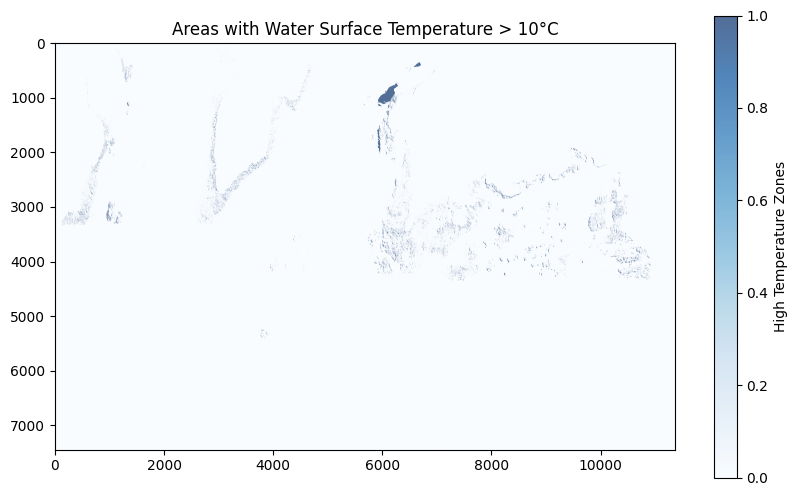

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the GeoTIFF file
thermal_file = "h12324_utm.tif"

with rasterio.open(thermal_file) as thermal:
    # Read the thermal band data
    temperature_data = thermal.read(1)
    transform = thermal.transform  # GeoTransform for spatial referencing

# Define a temperature threshold
threshold = 10

# Create a binary mask for areas with temperatures > 25°C
high_temp_areas = np.where(temperature_data < threshold, 1, 0)

# Get pixel coordinates (rows and columns) where high_temp_areas == 1
rows, cols = np.where(high_temp_areas == 1)

# Convert pixel coordinates to geographic coordinates (lat, lon)
lat_lon_coords = [rasterio.transform.xy(transform, row, col) for row, col in zip(rows, cols)]

# Print the first 10 coordinates as an example
print("Sample Coordinates (Longitude, Latitude):")
for coord in lat_lon_coords[:10]:
    print(coord)

# Visualize the high-temperature zones
plt.figure(figsize=(10, 6))
plt.imshow(high_temp_areas, cmap="Blues", alpha=0.7)
plt.title(f"Areas with Water Surface Temperature > {threshold}°C")
plt.colorbar(label="High Temperature Zones")
plt.show()
